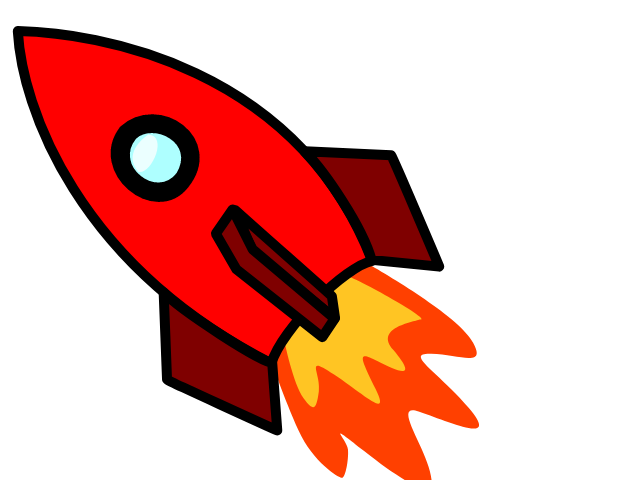

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   #Data Visualisation 
import seaborn as sbn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
space_data = pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')
space_data.head(2)

**Data Exploration**

In [ ]:
space_data.shape

In [ ]:
space_data.info()

In [ ]:
space_data.isna().sum()

**There are null values in Rocket Column.Lets drop it.The columns Unnamed also doesnt contain any unique information so lets drop those 2 columns too....**

In [ ]:
space_data.drop(['Unnamed: 0','Unnamed: 0.1',' Rocket'],axis=1,inplace=True)

In [ ]:
space_data.head(2)

In [ ]:
space_data['country_of_launch'] = space_data['Location'].apply(lambda x:x.split(',')[-1])
space_data.head(2)

In [ ]:
space_data['date'] = pd.to_datetime(space_data['Datum'],errors='coerce')
space_data['year_of_launch'] = space_data['date'].apply(lambda dt: dt.year)

In [ ]:
space_data.drop(columns=('Datum'),axis=1,inplace=True)

In [ ]:
space_data.head(2)

In [ ]:
# DATA ANALYSIS

**LETS SEE TOP 15 SPACE COMPANIES!!**

In [ ]:
top_15_companies=space_data['Company Name'].value_counts().head(15)
top_15_companies

In [ ]:
plt.figure(figsize=[17,7])
plt.style.use('seaborn-white')
top_15_companies.plot.bar(color=sbn.color_palette('Set1'))
plt.xlabel('Space Agencies',fontsize=20)
plt.ylabel('Launches',fontsize=20)
plt.tick_params(labelsize=13)
plt.title('TOTAL LAUNCHES PER SPACE AGENCY',fontsize=30)
plt.tight_layout()
plt.show()

LETS SEE WHICH ARE THE TOP MOST PREFERRED LAUNCHING LOCATIONS...

In [ ]:
most_preferred_loc=space_data.Location.value_counts().head(10)[::-1]
most_preferred_loc

In [ ]:
most_preferred_loc.plot.barh(color=sbn.color_palette('magma'))
plt.xlabel('No.of Launches',fontsize=20)
plt.ylabel('Launch Sites/Locations',fontsize=20)
plt.tick_params(labelsize=13)
plt.title('MOST PREFERRED LAUNCH LOCATIONS',fontsize=30)
plt.show()

Here we can see that most rockets are launched from Russian locations followed by Kazakhstan locations..

**PRFERRED COUNTRIES FOR LAUNCHES....**

In [ ]:
preferred_countries=space_data.country_of_launch.value_counts().head(10)
preferred_countries

In [ ]:
plt.figure(figsize=[17,7])
preferred_countries.plot.bar(color=sbn.color_palette('rocket'))
plt.xlabel('Country',fontsize=20)
plt.ylabel('No.of Launches',fontsize=20)
plt.tick_params(labelsize=13)
plt.title('PREFERRED COUNTRIES FOR LAUNCH',fontsize=30)
plt.show()

**STATUS ROCKET**

In [ ]:
status = space_data['Status Rocket'].value_counts()
status

In [ ]:
lab= ['StatusRetired','StatusActive']
col=['#ff1a1a','#0073e6']

In [ ]:
plt.figure(figsize=[7,7])
plt.pie(status,labels=lab,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',colors=col,explode=[0.0,0.05],shadow=True)
plt.title('STATUS ROCKET',fontsize=30)
plt.show()

So,we can see that from 1956 till now around 82% rockets launched have been retired ...

In [ ]:
plt.figure(figsize=[17,7])
plt.style.use('seaborn-whitegrid')
sbn.countplot('Company Name',data=space_data,hue='Status Rocket',palette='seismic',order=space_data['Company Name'].value_counts().head(15).index)
plt.xlabel('Space Companies',fontsize=20)
plt.ylabel('No.of Launches',fontsize=20)
plt.tick_params(labelsize=13)
plt.title('STATUS OF ROCKETS LAUNCHED',fontsize=30)
plt.tight_layout()
plt.show()

Russian space company have launched more rockets in the space than any other space agencies but, majority of the rockets are Retired.Coming to other space agencies some of them have their rockets active.Only space companies like CASC,ULA,Northrop and ISRO have more no of active rockets than retired ones...

**MISSION STATUS**

In [ ]:
mission_status = space_data['Status Mission'].value_counts()
mission_status

In [ ]:
lab = ['Success','Failure','Partial Failure','Prelaunch Failure']

In [ ]:
plt.figure(figsize=[8,8])
plt.pie(mission_status,labels=lab,wedgeprops={'edgecolor':'black'},shadow=1,autopct='%1.2f%%',explode=[0.0,0.0,0.0,0.09],colors=sbn.color_palette('Set3'))
plt.title('MISSION STATUS',fontsize=30)
plt.tight_layout()
plt.show()

Here we can see that majority of space missions are successful.There are only some space missions which fail completely,partially or there is a pre-failure...But looking at the positiv side we can see that about 90% of space missions are successfu!!!

**YEAR OF LAUNCH**

In [ ]:
plt.figure(figsize=[17,7])
plt.hist(space_data['year_of_launch'],edgecolor='#000000',color='brown')
plt.xlabel('Year Of Launch',fontsize=20)
plt.ylabel('No.of Launches',fontsize=20)
plt.title('NO.OF LAUNCHES PER FROM 1956-2020',fontsize=30)
plt.tick_params(labelsize=13)
plt.show()

In the beginning for first 5-8 years as development was taking place in the space technology there were less no of launches.But as the time advanced the space race began between the companies.From latter half of 60's decade to the end of 1980 the space race was at its peak.Afterwards as time advanced the no of launches decreased.Between 2000 and 2005 there were less no of launches but the worst was yet to come ...Due to the great 2008 recession there were only about ~275 launches worldwide.But after that Space Launches increased significantly and as the time proceeds it will go on increasing due to advancement of space technology....

**ITS MY FIRST KERNEL,KEEP SUPPORTING.THANK YOU FOR READING.PLEASE LET ME KNOW IF THERE'S ANY ERROR.**